<a href="https://colab.research.google.com/github/Roarou/Semester_Project/blob/main/WEEK7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LOADING DATA
from google.colab import files
train_file1 = list(files.upload().keys())[0]
train_file2 = list(files.upload().keys())[0]
train_file3 = list(files.upload().keys())[0]
test_file = list(files.upload().keys())[0]

Saving Exp1Normal01.txt to Exp1Normal01.txt


Saving Exp1Normal02.txt to Exp1Normal02.txt


Saving Exp1Normal03.txt to Exp1Normal03.txt


Saving Exp1Normal04.txt to Exp1Normal04.txt


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sklearn
from sklearn.cluster import KMeans

from sklearn.preprocessing import scale
import sklearn.metrics as sm 
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
#READING DATA
dftrain1 = pd.read_csv(train_file1,sep='\t')
dftrain2 = pd.read_csv(train_file2,sep='\t')
dftrain3 = pd.read_csv(train_file3,sep='\t')
deval = pd.read_csv(test_file,sep='\t')

In [ ]:
dftrain1.head()

,Event Start Trial Time [ms],Event End Trial Time [ms],Event Duration [ms],Visual Intake Position X [px],Visual Intake Position Y [px],Event
0,568.0,1467.0,899.0,912.0,567.0,Cap Off
1,1484.0,1604.0,120.0,911.0,547.0,Cap Off
2,1645.0,1765.0,120.0,846.0,581.0,Cap Off
3,1789.0,1969.0,180.0,862.0,570.0,Cap Off
4,2995.0,3105.0,110.0,1230.0,514.0,Cap Off


In [ ]:
#DATA VISUALISATION
deval.head()

,Event Start Trial Time [ms],Event End Trial Time [ms],Event Duration [ms],Visual Intake Position X [px],Visual Intake Position Y [px],Event
0,355.0,425.0,70.0,911.0,515.0,Cap Off
1,450.0,1449.0,999.0,934.0,512.0,Cap Off
2,1568.0,1658.0,90.0,970.0,531.0,Cap Off
3,1939.0,2069.0,130.0,996.0,556.0,Cap Off
4,2236.0,2326.0,90.0,953.0,538.0,Cap Off


In [ ]:
dftrain1.columns


Index(['Event Start Trial Time [ms]', 'Event End Trial Time [ms]',
       'Event Duration [ms]', 'Visual Intake Position X [px]',
       'Visual Intake Position Y [px]', 'Event'],
      dtype='object')

In [ ]:
COLUMNS_CATEGORIES= [ 'Start_time'     , 'End_Time',
                      'Event_Duration' , 'Position_X',
                      'Position_Y'  
                     ]
LABEL_CATEGORIES = ['Event']
#UNCOMPATIBILITY BETWEEN [] AND TENSORFLOW
dftrain1=dftrain1.rename(columns={'Event Start Trial Time [ms]'   : 'Start_time',
                                'Event End Trial Time [ms]'     : 'End_Time',
                                'Event Duration [ms]'           : 'Event_Duration',
                                'Visual Intake Position X [px]' : 'Position_X',
                                'Visual Intake Position Y [px]' : 'Position_Y'})
dftrain2=dftrain2.rename(columns={'Event Start Trial Time [ms]'   : 'Start_time',
                                'Event End Trial Time [ms]'     : 'End_Time',
                                'Event Duration [ms]'           : 'Event_Duration',
                                'Visual Intake Position X [px]' : 'Position_X',
                                'Visual Intake Position Y [px]' : 'Position_Y'})
dftrain3=dftrain3.rename(columns={'Event Start Trial Time [ms]'   : 'Start_time',
                                'Event End Trial Time [ms]'     : 'End_Time',
                                'Event Duration [ms]'           : 'Event_Duration',
                                'Visual Intake Position X [px]' : 'Position_X',
                                'Visual Intake Position Y [px]' : 'Position_Y'})
deval=deval.rename(columns={'Event Start Trial Time [ms]'   : 'Start_time',
                                'Event End Trial Time [ms]'     : 'End_Time',
                                'Event Duration [ms]'           : 'Event_Duration',
                                'Visual Intake Position X [px]' : 'Position_X',
                                'Visual Intake Position Y [px]' : 'Position_Y'})
dftrain1.head()

,Start_time,End_Time,Event_Duration,Position_X,Position_Y,Event
0,568.0,1467.0,899.0,912.0,567.0,Cap Off
1,1484.0,1604.0,120.0,911.0,547.0,Cap Off
2,1645.0,1765.0,120.0,846.0,581.0,Cap Off
3,1789.0,1969.0,180.0,862.0,570.0,Cap Off
4,2995.0,3105.0,110.0,1230.0,514.0,Cap Off


In [ ]:
feature_columns = []
labels = []
for feature_name in LABEL_CATEGORIES:
  vocabulary = dftrain1[feature_name].unique()  # gets a list of all unique values from given feature column
  labels.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in COLUMNS_CATEGORIES:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(labels)

[VocabularyListCategoricalColumn(key='Event', vocabulary_list=('Cap Off', 'Apply Tip', 'Setting Units', 'Priming', 'Injection', 'Remove Tip', 'Cap On'), dtype=tf.string, default_value=-1, num_oov_buckets=0)]


In [ ]:
y_train1 = dftrain1.pop('Event')
y_train2 = dftrain2.pop('Event')
y_train3 = dftrain3.pop('Event')
y_eval = deval.pop('Event')
dftrain1.head()

,Start_time,End_Time,Event_Duration,Position_X,Position_Y
0,568.0,1467.0,899.0,912.0,567.0
1,1484.0,1604.0,120.0,911.0,547.0
2,1645.0,1765.0,120.0,846.0,581.0
3,1789.0,1969.0,180.0,862.0,570.0
4,2995.0,3105.0,110.0,1230.0,514.0


In [ ]:
#REPLACING DATA
for i in range(len(y_train1)):
  if y_train1[i] == 'Cap Off':
    y_train1[i] = 1
  if y_train1[i] == 'Apply Tip':
    y_train1[i] = 2
  if y_train1[i] == 'Setting Units':
    y_train1[i] = 3
  if y_train1[i] == 'Priming':
    y_train1[i] = 4
  if y_train1[i] == 'Injection':
    y_train1[i] = 5
  if y_train1[i] == 'Remove Tip':
    y_train1[i] = 6
  if y_train1[i] == 'Cap On':
    y_train1[i] = 7

In [ ]:
for i in range(len(y_train2)):
  if y_train2[i] == 'Cap Off':
    y_train2[i] = 1
  if y_train2[i] == 'Apply Tip':
    y_train2[i] = 2
  if y_train2[i] == 'Setting Units':
    y_train2[i] = 3
  if y_train2[i] == 'Priming':
    y_train2[i] = 4
  if y_train2[i] == 'Injection':
    y_train2[i] = 5
  if y_train2[i] == 'Remove Tip':
    y_train2[i] = 6
  if y_train2[i] == 'Cap On':
    y_train2[i] = 7

In [ ]:
for i in range(len(y_train3)):
  if y_train3[i] == 'Cap Off':
    y_train3[i] = 1
  if y_train3[i] == 'Apply Tip':
    y_train3[i] = 2
  if y_train3[i] == 'Setting Units':
    y_train3[i] = 3
  if y_train3[i] == 'Priming':
    y_train3[i] = 4
  if y_train3[i] == 'Injection':
    y_train3[i] = 5
  if y_train3[i] == 'Remove Tip':
    y_train3[i] = 6
  if y_train3[i] == 'Cap On':
    y_train3[i] = 7

In [ ]:
for i in range(len(y_eval)):
  if y_eval[i] == 'Cap Off':
    y_eval[i] = 1
  if y_eval[i] == 'Apply Tip':
    y_eval[i] = 2
  if y_eval[i] == 'Setting Units':
    y_eval[i] = 3
  if y_eval[i] == 'Priming':
    y_eval[i] = 4
  if y_eval[i] == 'Injection':
    y_eval[i] = 5
  if y_eval[i] == 'Remove Tip':
    y_eval[i] = 6
  if y_eval[i] == 'Cap On':
    y_eval[i] = 7

In [ ]:
#UNCOMPATIBILITY AGAIN
y_train1 = y_train1.astype(int)
dftrain1 = dftrain1.astype(float)
y_train2 = y_train2.astype(int)
dftrain2 = dftrain2.astype(float)
y_train3 = y_train3.astype(int)
dftrain3 = dftrain3.astype(float)
y_eval = y_eval.astype(int)
deval = deval.astype(float)

In [ ]:
#INPUT FUNCTION 
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

In [ ]:
train_input_fn1 = make_input_fn(dftrain1, y_train1)
train_input_fn2 = make_input_fn(dftrain2, y_train2)
train_input_fn3 = make_input_fn(dftrain3, y_train3)
eval_input_fn = make_input_fn(deval, y_eval, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns,n_classes = 8)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpq47qllge', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn1)  # train
linear_est.train(train_input_fn2)
linear_est.train(train_input_fn3)
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data
clear_output()  # clears consoke output
print(result['accuracy'])

0.5


Conclusion : Not a linear dependency

In [ ]:
def input_fn(features, labels, training=True, batch_size=10):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    
    return dataset.batch(batch_size)


NEURAL NETWORK

In [ ]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[166, 80, 50, 20, 20],
    # The model must choose between 8 classes.
    n_classes=8)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8kynq9y8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
classifier.train(
    input_fn=lambda: input_fn(dftrain1, y_train1, training=True),
    steps=10000)
classifier.train(
    input_fn=lambda: input_fn(dftrain2, y_train2, training=True),
    steps=10000)
classifier.train(
    input_fn=lambda: input_fn(dftrain3, y_train3, training=True),
    steps=10000)
# We include a lambda to avoid creating an inner function previously

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8kynq9y8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1333.7211, step = 0
INFO:tensorflow:global_step/sec: 487.163
INFO:tensorflow:loss = 27.683594, step = 100 (0.211 sec)
INFO:tensorflow:global_step/sec: 804.59
INFO:tensorflow:loss = 11.925019, step = 200 (0.124 sec)
INFO:tensorflow:global_step/sec: 704.638
INFO:tensorflow:loss = 6.9756727, step = 300 (0.141 sec)
INFO:tensorflow:global_step/sec: 709.606
INFO:tensorflow:loss = 6.283736, step = 400 (0.141 sec)
INFO:tensorflow:global_step/sec: 740.98
INFO:tensorflow:loss = 25.00609, step = 500 (0.131 sec)
INFO:tenso

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(deval, y_eval, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-06T12:21:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8kynq9y8/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.35062s
INFO:tensorflow:Finished evaluation at 2022-04-06-12:21:43
INFO:tensorflow:Saving dict for global step 30000: accuracy = 0.69736844, average_loss = 1.0619911, global_step = 30000, loss = 1.0807998
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30000: /tmp/tmp8kynq9y8/model.ckpt-30000

Test set accuracy: 0.697



NEURAL NETWORK RANDOM LAYERS


In [ ]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[200, 300, 100, 80, 20],
    # The model must choose between 8 classes.
    n_classes=8)
classifier.train(
    input_fn=lambda: input_fn(dftrain1, y_train1, training=True),
    steps=10000)
classifier.train(
    input_fn=lambda: input_fn(dftrain2, y_train2, training=True),
    steps=10000)
classifier.train(
    input_fn=lambda: input_fn(dftrain3, y_train3, training=True),
    steps=10000)

clear_output()  

eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(deval, y_eval, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-05T20:13:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvahyvv5l/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.52391s
INFO:tensorflow:Finished evaluation at 2022-04-05-20:13:49
INFO:tensorflow:Saving dict for global step 30000: accuracy = 0.5131579, average_loss = 1.6469576, global_step = 30000, loss = 1.6659927
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30000: /tmp/tmpvahyvv5l/model.ckpt-30000

Test set accuracy: 0.513



UNSUPERVISED LEARNING

In [ ]:
clustering = KMeans(n_clusters = 7, random_state = 5)
clustering.fit(dftrain1)

KMeans(n_clusters=7, random_state=5)

In [ ]:
dftrain1.columns

Index(['Start_time', 'End_Time', 'Event_Duration', 'Position_X', 'Position_Y'], dtype='object')

Text(0.5, 1.0, 'KMeans Classification')

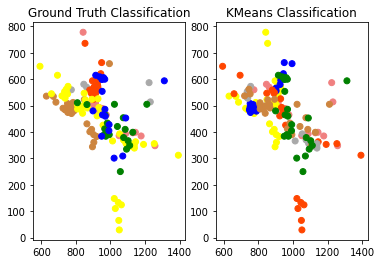

In [ ]:
color_theme = np.array(['black', 'darkgray', 'lightcoral', 'orangered', 'peru', 'yellow', 'green', 'blue'])

plt.subplot(1,2,1)

plt.scatter(x = dftrain1.Position_X, y = dftrain1.Position_Y, c = color_theme[y_train1])

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = dftrain1.Position_X, y = dftrain1.Position_Y, c = color_theme[relabel])

plt.title('KMeans Classification')

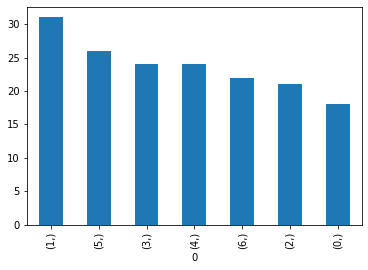

In [ ]:
test = pd.DataFrame(clustering.labels_)
test.value_counts().plot(kind = 'bar')

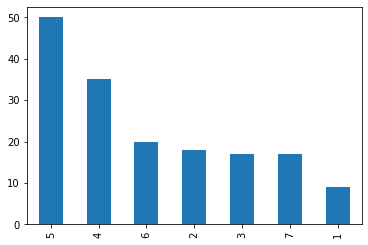

In [ ]:
y_train1.value_counts().plot(kind = 'bar')
relabel = np.choose ( clustering.labels_,[1,5,7,6,2,4,3]).astype(np.int64)

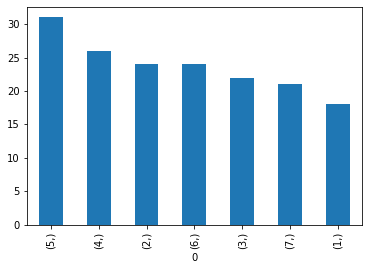

In [ ]:
test = pd.DataFrame(relabel)
test.value_counts().plot(kind = 'bar')

In [ ]:
print(classification_report(y_train1,relabel))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.62      0.83      0.71        18
           3       0.14      0.18      0.15        17
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        50
           6       0.29      0.35      0.32        20
           7       0.00      0.00      0.00        17

    accuracy                           0.15       166
   macro avg       0.15      0.19      0.17       166
weighted avg       0.12      0.15      0.13       166



In [ ]:
clustering = KMeans(n_clusters = 7, random_state = 5)
clustering.fit(dftrain2)

KMeans(n_clusters=7, random_state=5)

Text(0.5, 1.0, 'KMeans Classification')

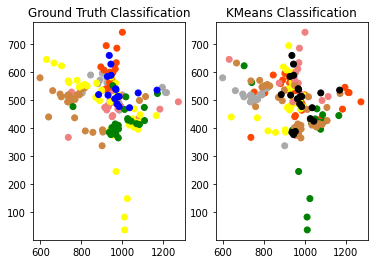

In [ ]:
color_theme = np.array(['black', 'darkgray', 'lightcoral', 'orangered', 'peru', 'yellow', 'green', 'blue'])

plt.subplot(1,2,1)

plt.scatter(x = dftrain2.Position_X, y = dftrain2.Position_Y, c = color_theme[y_train2])

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = dftrain2.Position_X, y = dftrain2.Position_Y, c = color_theme[clustering.labels_])

plt.title('KMeans Classification')

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


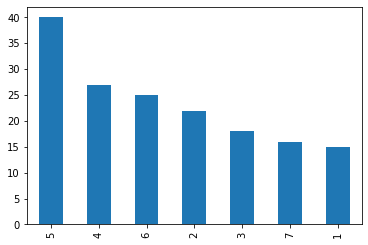

In [ ]:
y_train2.value_counts().plot(kind = 'bar')

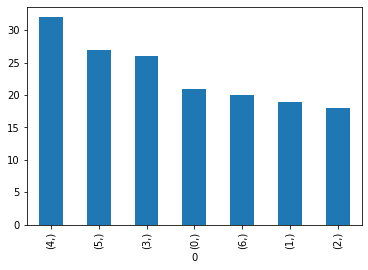

In [ ]:
test = pd.DataFrame(clustering.labels_)
test.value_counts().plot(kind = 'bar')

NameError: ignored